In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import glob
from pprint import pprint

import utils

In [3]:
# reading the dataset
data_dir = "./Data/*bin"

datasets = glob.glob(data_dir)
datasets.sort()
pprint(datasets)

['./Data/bit00.bin',
 './Data/bit00_01_10_11.bin',
 './Data/bit00_10.bin',
 './Data/bit01.bin',
 './Data/bit10.bin',
 './Data/bit11.bin']


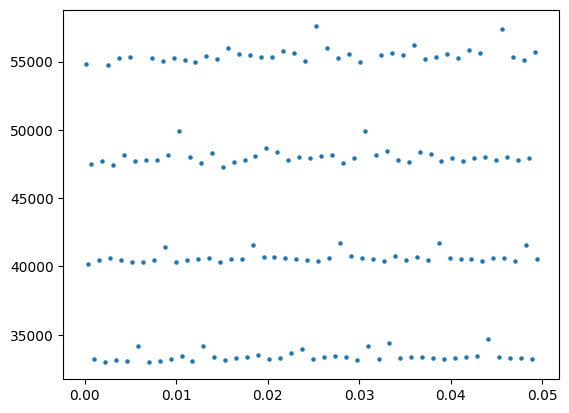

In [4]:
data = np.array(utils.parse_bin_file(datasets[1]))
timestamp = data[:, 0]
amplitude = data[:, 1]

amplitude = amplitude - np.mean(amplitude)
fs = len(timestamp) / (1e-6 * (timestamp[-1] - timestamp[0])) # timestamps in 1us

nfft = 2**14

size = len(amplitude)

seg_idx, cor = utils.get_seg_idx(amplitude, fs)

plt.figure()
freqs = []
timestamps = []

for j in range(len(seg_idx)-1):
    try:
        if seg_idx[j+1] - seg_idx[j] < 30:
            continue
        x = amplitude[seg_idx[j]:seg_idx[j+1]]
        # windows to be applied
        hann_wind = np.hamming(len(x))                  #hanning window
        w, H = utils.zoom_fft((x - np.mean(x)*hann_wind), fs=fs, min_freq=1.5e4, max_freq=6e4, nfft=2**14)      # FFT
        peaks, heights = signal.find_peaks(np.abs(H), height=np.max(np.abs(H))*0.99)                 # peak detection
        peak = w[peaks[0]]
        freqs.append(peak)
        timestamps.append(timestamp[seg_idx[j]])
    except:
        continue

timestamps = timestamps - timestamp[0]
timestamps = np.array(timestamps)/1e6


plt.scatter(timestamps, freqs, s=5)

[55614.26055500023, 48220.457128612914, 40693.36138170749, 33368.55633300014]


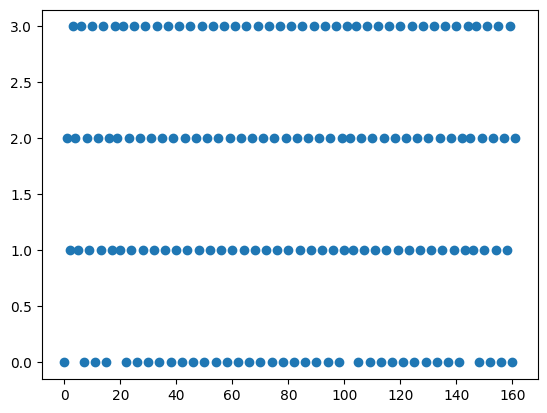

In [5]:
arrays = [utils.get_output_theory(69, 1e9, 150e-6, 0.705),
          utils.get_output_theory(69, 1e9, 173e-6, 0.705),
          utils.get_output_theory(69, 1e9, 205e-6, 0.705),
          utils.get_output_theory(69, 1e9, 250e-6, 0.705)]
print(arrays)

a = utils.find_closest(arrays, freqs)

plt.scatter(np.arange(len(a)), a)